In [1]:
#Importing all the necessary libraries

import torch
import torch.nn as nn
from torch.autograd import Variable
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import time
import math, time
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import plotly.io as pio
import gc


In [2]:
#Input the stocks price dataset
df=pd.read_csv('GOOGLE_STOCK_DATA.csv')

In [3]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2004-08-19 00:00:00+00:00,100.335,104.0600,95.96,100.01,44659000,2.516142,2.609555,2.406428,2.507992,1780845677,0.0,1.0
1,GOOGL,2004-08-20 00:00:00+00:00,108.310,109.0800,100.50,101.01,22834300,2.716134,2.735444,2.520280,2.533069,910552508,0.0,1.0
2,GOOGL,2004-08-23 00:00:00+00:00,109.400,113.4800,109.05,110.76,18256100,2.743469,2.845785,2.734692,2.777574,727989806,0.0,1.0
3,GOOGL,2004-08-24 00:00:00+00:00,104.870,111.6000,103.57,111.24,15247300,2.629868,2.798639,2.597268,2.789611,608009321,0.0,1.0
4,GOOGL,2004-08-25 00:00:00+00:00,106.000,108.0000,103.88,104.76,9188600,2.658206,2.708360,2.605042,2.627110,366409426,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4845,GOOGL,2023-11-16 00:00:00+00:00,136.930,137.2199,134.32,135.19,28013179,136.930000,137.219900,134.320000,135.190000,28013179,0.0,1.0
4846,GOOGL,2023-11-17 00:00:00+00:00,135.310,136.0600,133.65,136.00,37287691,135.310000,136.060000,133.650000,136.000000,37287691,0.0,1.0
4847,GOOGL,2023-11-20 00:00:00+00:00,136.250,136.6600,133.62,133.69,27850762,136.250000,136.660000,133.620000,133.690000,27850762,0.0,1.0
4848,GOOGL,2023-11-21 00:00:00+00:00,136.970,137.1800,135.96,136.29,22635272,136.970000,137.180000,135.960000,136.290000,22635272,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       4850 non-null   object 
 1   date         4850 non-null   object 
 2   close        4850 non-null   float64
 3   high         4850 non-null   float64
 4   low          4850 non-null   float64
 5   open         4850 non-null   float64
 6   volume       4850 non-null   int64  
 7   adjClose     4850 non-null   float64
 8   adjHigh      4850 non-null   float64
 9   adjLow       4850 non-null   float64
 10  adjOpen      4850 non-null   float64
 11  adjVolume    4850 non-null   int64  
 12  divCash      4850 non-null   float64
 13  splitFactor  4850 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 530.6+ KB


## Cleaning the data

In [5]:
#removing timestamps from the date column
df['date'] = df['date'].str.split(' ').str[0]

In [6]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOGL,2004-08-19,100.335,104.0600,95.96,100.01,44659000,2.516142,2.609555,2.406428,2.507992,1780845677,0.0,1.0
1,GOOGL,2004-08-20,108.310,109.0800,100.50,101.01,22834300,2.716134,2.735444,2.520280,2.533069,910552508,0.0,1.0
2,GOOGL,2004-08-23,109.400,113.4800,109.05,110.76,18256100,2.743469,2.845785,2.734692,2.777574,727989806,0.0,1.0
3,GOOGL,2004-08-24,104.870,111.6000,103.57,111.24,15247300,2.629868,2.798639,2.597268,2.789611,608009321,0.0,1.0
4,GOOGL,2004-08-25,106.000,108.0000,103.88,104.76,9188600,2.658206,2.708360,2.605042,2.627110,366409426,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4845,GOOGL,2023-11-16,136.930,137.2199,134.32,135.19,28013179,136.930000,137.219900,134.320000,135.190000,28013179,0.0,1.0
4846,GOOGL,2023-11-17,135.310,136.0600,133.65,136.00,37287691,135.310000,136.060000,133.650000,136.000000,37287691,0.0,1.0
4847,GOOGL,2023-11-20,136.250,136.6600,133.62,133.69,27850762,136.250000,136.660000,133.620000,133.690000,27850762,0.0,1.0
4848,GOOGL,2023-11-21,136.970,137.1800,135.96,136.29,22635272,136.970000,137.180000,135.960000,136.290000,22635272,0.0,1.0


In [7]:
df = df.reset_index()[['date', 'adjClose']]
df_dates = df.iloc[:,0]
df['date'] = pd.to_datetime(df['date'])

In [8]:
df = df.set_index('date')

In [9]:
df

,adjClose
date,
2004-08-19,2.516142
2004-08-20,2.716134
2004-08-23,2.743469
2004-08-24,2.629868
2004-08-25,2.658206
...,...
2023-11-16,136.930000
2023-11-17,135.310000
2023-11-20,136.250000


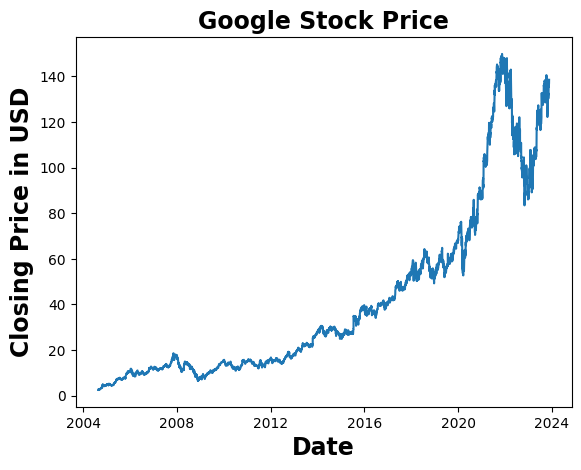

In [10]:

plt.plot(df[['adjClose']])
plt.title("Google Stock Price", fontsize=17, fontweight='bold')
plt.xlabel('Date', fontsize=17,fontweight='bold')
plt.ylabel('Closing Price in USD', fontsize=17,fontweight='bold')
plt.show()

In [11]:
#displaying an array of the original prices
df_prices = df['adjClose'].values.reshape(-1,1)

In [12]:
df_prices

array([[  2.51614209],
       [  2.71613445],
       [  2.74346883],
       ...,
       [136.25      ],
       [136.97      ],
       [138.49      ]])

In [13]:
#Seamless device selection to move between CPU and GPU based on availability


def get_default_device():
    """Picking a GPU if available, otherwise CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')

def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

def torch_data(data, device):
    """Move data to a device"""
    return to_device(torch.from_numpy(data).type(torch.Tensor), device)

In [14]:
device = get_default_device()
device

device(type='cuda')

In [15]:
# converting an array of values into sequences in accordance with window size
def create_seq_from_array(dataset, time_step):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step -1):
		a = dataset.iloc[i:(i + time_step)]
		dataX.append(a)
		dataY.append(dataset.iloc[i + time_step])
	return np.array(dataX), np.array(dataY)

In [16]:
# convert an array of values into a dataset matrix
def convert_array_to_dataset(dataset, time_step):

	#splitting our dataset into training, validation and testing
	train_size = round(len(dataset) * 0.80)
	remaining_size = len(dataset) - train_size
	val_size = round(0.50 * remaining_size)
	train_data, val_data, test_data = dataset.iloc[0:train_size, :], dataset.iloc[train_size:(train_size + val_size), :], dataset.iloc[(train_size + val_size):len(dataset), :]

	#scaling this data between 0 to 1
	scaler = MinMaxScaler(feature_range = (0, 1))
	train_data['adjClose'] = scaler.fit_transform(np.array(train_data['adjClose']).reshape(-1, 1))
	#making sure test data does not leak
	val_data['adjClose'] = scaler.transform(np.array(val_data['adjClose']).reshape(-1, 1))
	test_data['adjClose'] = scaler.transform(np.array(test_data['adjClose']).reshape(-1, 1))

	X_train, y_train = create_seq_from_array(train_data, time_step)
	X_val, y_val = create_seq_from_array(val_data, time_step)
	X_test, y_test = create_seq_from_array(test_data, time_step)

	# reshaping our input to be [samples, time steps, features] which is required for LSTM
	X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
	X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
	X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

	y_train = y_train.reshape(y_train.shape[0], 1)
	y_val = y_val.reshape(y_val.shape[0], 1)
	y_test = y_test.reshape(y_test.shape[0], 1)

	return X_train, X_val, X_test, y_train, y_val, y_test, scaler

In [17]:
# convert an array of values into a dataset matrix
def convert_array_to_dataset_test(dataset, time_step):

	##splitting dataset into train  test split
	train_size = round(len(dataset) * 0.90)
	train_data, test_data = dataset.iloc[0:train_size, :], dataset.iloc[train_size:, :]

	#scaling our data between 0 to 1
	scaler = MinMaxScaler(feature_range = (0, 1))
	train_data['adjClose'] = scaler.fit_transform(np.array(train_data['adjClose']).reshape(-1, 1))
	#Ensuring our test data does not leak into the others
	test_data['adjClose'] = scaler.transform(np.array(test_data['adjClose']).reshape(-1, 1))

	X_train, y_train = create_seq_from_array(train_data, time_step)
	X_test, y_test = create_seq_from_array(test_data, time_step)

	# reshape input to be [samples, time steps, features] which is required for LSTM
	X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
	X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

	y_train = y_train.reshape(y_train.shape[0], 1)
	y_test = y_test.reshape(y_test.shape[0], 1)

	return X_train, X_test, y_train, y_test, scaler

In [18]:
# Create a baseline default RNN Model
class RNN_base(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNN_base, self).__init__()

        # Number of hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first = True, nonlinearity = 'tanh')

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        # Initializing any hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=device))

        # Single time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [19]:
# this is the function to train the model
def fit(num_epochs, lr, model, loss_type, opt_func, X_train, y_train):
    optimiser = opt_func(model.parameters(), lr)
    hist = np.zeros(num_epochs)
    start_time = time.time()
    for t in range(num_epochs):
        y_train_pred = model(X_train)
        loss = loss_type(y_train_pred, y_train)
        #print("Epoch ", t, "MSE: ", loss.item())
        hist[t] = loss.item()

        # Reset gradients
        optimiser.zero_grad()

        # Compute gradients
        loss.backward()

        # Update parameters
        optimiser.step()

    training_time = time.time()-start_time
    print("Training time: {}".format(training_time))
    print()

    return hist, y_train_pred

In [20]:
# to plot the loss curve
def plot_loss(history):
    sns.set_style("darkgrid")
    fig = plt.figure(figsize=(8, 5))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    ax = sns.lineplot(data = history, color='royalblue')
    ax.set_xlabel("Epoch", size = 14)
    ax.set_ylabel("Loss", size = 14)
    ax.set_title("Training Loss vs Epochs", size = 14, fontweight='bold')

In [21]:
# producing dynamic prediction plots
def plotly_predictions(results):

    fig = go.Figure()
    fig.add_trace(go.Scatter(go.Scatter(x=results['date'], y=results[0],
                        mode='lines',
                        name='Train prediction',
                        line = dict(color='#ff7f0e'))))
    fig.add_trace(go.Scatter(x=results['date'], y=results[1],
                        mode='lines',
                        name='Test prediction',
                        line = dict(color='#d62728')))
    fig.add_trace(go.Scatter(go.Scatter(x=results['date'], y=results[2],
                        opacity=0.6,
                        mode='lines',
                        name='Actual Value',
                        line = dict(color='#1f77b4'))))
    fig.update_layout(
        xaxis=dict(
            title_text='Dates',
            titlefont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
        ),
        yaxis=dict(
            title_text='Close (USD)',
            titlefont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
            showline=True,
            showgrid=True,
            showticklabels=True,
            linecolor='black',
            linewidth=2,
            ticks='outside',
            tickfont=dict(
                family='Rockwell',
                size=12,
                color='black',
            ),
        ),
        showlegend=True,
        template = 'plotly_white'

    )

    annotations = []
    annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                                xanchor='left', yanchor='bottom',
                                text='Results',
                                font=dict(family='Rockwell',
                                            size=26,
                                            color='black'),
                                showarrow=False))
    fig.update_layout(annotations=annotations)

    fig.show()

In [22]:
#run function to evaluate the models in experiments
def evaluate_model_experiments(model, num_epochs, lr, loss_type, optimiser, time_step):

    X_train, X_val, X_test, y_train, y_val, y_test, scaler = convert_array_to_dataset(df, time_step)
    X_train = torch_data(X_train, device)
    X_val = torch_data(X_val, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device)
    y_val = torch_data(y_val, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_val_pred = model(X_val)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
    y_val = scaler.inverse_transform(y_val.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    valScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print('Validation Score: %.2f RMSE' % (valScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_val_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    valPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    valPredictPlot[:, :] = np.nan
    valPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_val_pred

    original = df[0 : end_of_time]
    predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)

    #getting and appending the results to the results list
    metadata = [[time_step, model.layer_dim, model.hidden_dim, trainScore, valScore]]
    metadata = pd.DataFrame(metadata, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'])

    return metadata

In [23]:
#run function to evaluate a single model
def evaluate_single_model(model, num_epochs, lr, loss_type, optimiser, time_step):

    X_train, X_val, X_test, y_train, y_val, y_test, scaler = convert_array_to_dataset(df, time_step)
    X_train = torch_data(X_train, device)
    X_val = torch_data(X_val, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device)
    y_val = torch_data(y_val, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_val_pred = model(X_val)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_val_pred = scaler.inverse_transform(y_val_pred.cpu().detach().numpy())
    y_val = scaler.inverse_transform(y_val.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    valScore = math.sqrt(mean_squared_error(y_val, y_val_pred))
    print('Validation Score: %.2f RMSE' % (valScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_val_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    valPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    valPredictPlot[:, :] = np.nan
    valPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_val_pred


    original = df[0 : end_of_time]
    predictions = np.append(trainPredictPlot, valPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)
    plot_loss(history)
    plotly_predictions(result)
    return None

In [24]:
#run function to evaluate the final model
def test_final_model(model, num_epochs, lr, loss_type, optimiser, time_step):

    X_train, X_test, y_train, y_test, scaler = convert_array_to_dataset_test(df, time_step)
    X_train = torch_data(X_train, device)
    X_test = torch_data(X_test, device)
    y_train = torch_data(y_train, device)
    y_test = torch_data(y_test, device)

    history, y_train_pred = fit(num_epochs, lr, model, loss_type, optimiser, X_train, y_train)

    gc.collect()
    torch.cuda.empty_cache()

    # make predictions
    y_test_pred = model(X_test)

    # invert predictions
    y_train_pred = scaler.inverse_transform(y_train_pred.cpu().detach().numpy())
    y_train = scaler.inverse_transform(y_train.cpu().detach().numpy())
    y_test_pred = scaler.inverse_transform(y_test_pred.cpu().detach().numpy())
    y_test = scaler.inverse_transform(y_test.cpu().detach().numpy())

    # calculate root mean squared error
    trainScore = math.sqrt(mean_squared_error(y_train, y_train_pred))
    print("===========================")
    print('Train Score: %.2f RMSE' % (trainScore))
    print("===========================")
    testScore = math.sqrt(mean_squared_error(y_test, y_test_pred))
    print('Test Score: %.2f RMSE' % (testScore))
    print("===========================")

    end_of_time = len(y_train_pred) + len(y_test_pred) + (time_step * 2) + 1

    # shift train predictions for plotting
    trainPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[time_step : len(y_train_pred) + time_step, :] = y_train_pred

    # shift test predictions for plotting
    testPredictPlot = np.empty_like(df_prices[0 : end_of_time])
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(y_train_pred)  + (time_step * 2) + 1 : end_of_time, :] = y_test_pred


    original = df[0 : end_of_time]
    predictions = np.append(trainPredictPlot, testPredictPlot, axis=1)
    predictions = np.append(predictions, original, axis=1)
    result = pd.DataFrame(predictions)
    result = pd.concat([result, df_dates.iloc[0 : end_of_time]], axis = 1)
    plot_loss(history)
    plotly_predictions(result)
    return None

## Baseline RNN model

Training time: 2.4413766860961914

Train Score: 7.20 RMSE
Validation Score: 61.04 RMSE


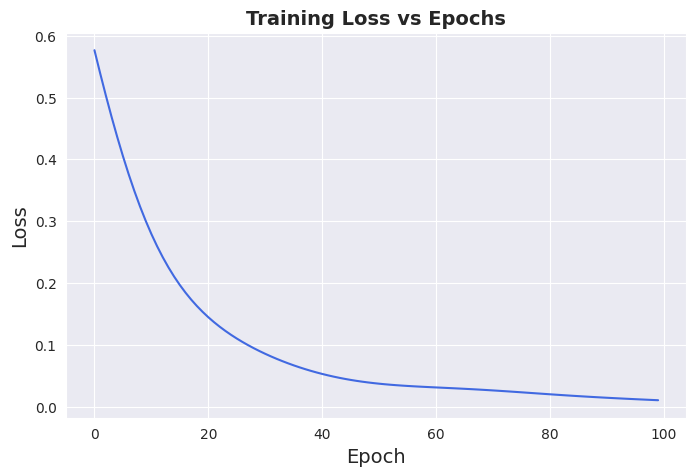

In [25]:
#parameters for Baseline default RNN
input_dim = 1
hidden_dim = 1
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 20

#declaring the model
torch.manual_seed(69)
baseline_rnn = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
baseline_rnn = to_device(baseline_rnn, device)

#training and evaluating model
evaluate_single_model(baseline_rnn, num_epochs, lr, loss_type, optimiser, time_step)



# Experimenting with baseline RNN

## Using ReLU as the non-linearity function in RNN

In [26]:
# RNN model with relu as nonlinearity
class RNN_relu(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(RNN_relu, self).__init__()

        # Number of hidden dimensions
        self.hidden_dim = hidden_dim

        # Number of hidden layers
        self.layer_dim = layer_dim

        # RNN
        self.rnn = nn.RNN(input_dim, hidden_dim, layer_dim, batch_first = True, nonlinearity = 'relu')

        # Readout layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):

        # Initialize hidden state with zeros
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device=device))

        # One time step
        out, hn = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])
        return out

Training time: 0.1748182773590088

Train Score: 17.24 RMSE
Validation Score: 60.73 RMSE


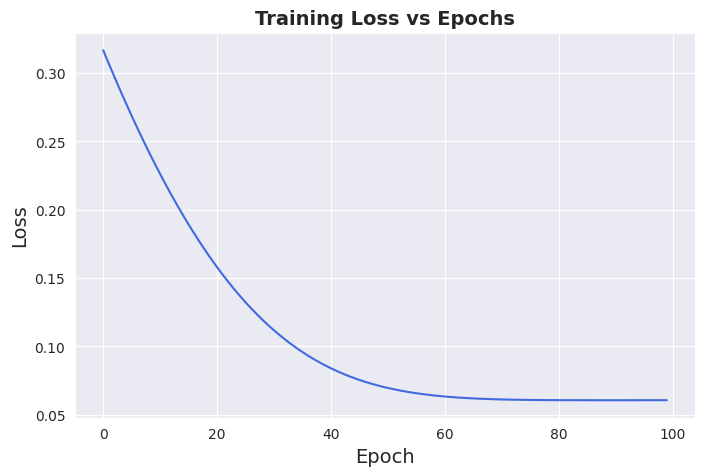

In [27]:
#parameters for RNN
input_dim = 1
hidden_dim = 1
num_layers = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam
time_step = 20

#declaring the model
torch.manual_seed(69)
relu_rnn = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
relu_rnn = to_device(relu_rnn, device)

#training and evaluating model
evaluate_single_model(relu_rnn, num_epochs, lr, loss_type, optimiser, time_step)

## Hyperparameter Tuning with RNN

In [28]:
#constant parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#lists of parameters for hyperparameter tuning
num_layers = [1, 2]
sliding_windows = [20, 30, 50, 100]
hidden_dims = [2, 4, 8, 16, 32]

tanh_results = []
relu_results = []
for time_step in sliding_windows:
    for hidden_dim in hidden_dims:
        for layers in num_layers:

            print("====================================================")
            print("Time Step =", time_step, "| Hidden States =", hidden_dim, "| Num Layers =", layers)
            print("====================================================")
            print()

            #declaring the tanh RNN model
            torch.manual_seed(69)
            tanh_rnn = RNN_base(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            tanh_rnn = to_device(tanh_rnn, device)
            #training and evaluating model
            tanh_res = evaluate_model_experiments(tanh_rnn, num_epochs, lr, loss_type, optimiser, time_step)
            tanh_results += [tanh_res.iloc[0]]
            print()

            #declaring the ReLU RNN model
            torch.manual_seed(69)
            relu_rnn_exp = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            relu_rnn_exp = to_device(relu_rnn_exp, device)
            #training and evaluating model
            relu_res = evaluate_model_experiments(relu_rnn_exp, num_epochs, lr, loss_type, optimiser, time_step)
            relu_results += [relu_res.iloc[0]]
            print()

Time Step = 20 | Hidden States = 2 | Num Layers = 1

Training time: 0.18437457084655762

Train Score: 0.58 RMSE
Validation Score: 23.66 RMSE

Training time: 0.16965603828430176

Train Score: 1.11 RMSE
Validation Score: 1.97 RMSE

Time Step = 20 | Hidden States = 2 | Num Layers = 2

Training time: 0.23495173454284668

Train Score: 0.75 RMSE
Validation Score: 33.92 RMSE

Training time: 0.2638990879058838

Train Score: 0.65 RMSE
Validation Score: 3.50 RMSE

Time Step = 20 | Hidden States = 4 | Num Layers = 1

Training time: 0.21891260147094727

Train Score: 1.29 RMSE
Validation Score: 29.25 RMSE

Training time: 0.18281865119934082

Train Score: 0.53 RMSE
Validation Score: 1.85 RMSE

Time Step = 20 | Hidden States = 4 | Num Layers = 2

Training time: 0.20797395706176758

Train Score: 1.25 RMSE
Validation Score: 36.90 RMSE

Training time: 0.25786375999450684

Train Score: 0.65 RMSE
Validation Score: 33.56 RMSE

Time Step = 20 | Hidden States = 8 | Num Layers = 1

Training time: 0.1911709308

In [29]:
tanh_results = pd.DataFrame(tanh_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)
relu_results = pd.DataFrame(relu_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)

In [30]:
tanh_results = tanh_results.sort_values('valScore', ascending=True, ignore_index = True)
tanh_results

,time_step,num_layers,hidden_dim,trainScore,valScore
0,20.0,1.0,16.0,0.594177,14.390610
1,30.0,1.0,16.0,0.594776,14.539193
2,50.0,1.0,16.0,0.595902,14.871466
3,100.0,1.0,16.0,0.599551,15.812672
4,20.0,1.0,32.0,0.650786,16.223450
5,30.0,1.0,32.0,0.651748,16.431739
6,50.0,1.0,32.0,0.653125,16.799318
7,100.0,1.0,32.0,0.657299,17.834448
8,20.0,2.0,32.0,0.657376,22.255283
9,30.0,2.0,32.0,0.656863,22.544246


In [31]:
relu_results = relu_results.sort_values('valScore', ascending=True, ignore_index = True)
relu_results

,time_step,num_layers,hidden_dim,trainScore,valScore
0,50.0,1.0,4.0,0.536260,1.790115
1,30.0,1.0,4.0,0.532798,1.844873
2,20.0,1.0,4.0,0.532208,1.853388
3,100.0,1.0,4.0,0.549099,1.872276
4,50.0,1.0,2.0,1.053370,1.888819
5,100.0,1.0,2.0,0.978810,1.961272
6,20.0,1.0,2.0,1.114023,1.968765
7,30.0,1.0,2.0,1.090100,1.969469
8,20.0,1.0,32.0,0.632210,2.218151
9,20.0,2.0,32.0,0.710033,2.775613


In [32]:
best_rnn_model = relu_results.iloc[0]
best_rnn_model

time_step     50.000000
num_layers     1.000000
hidden_dim     4.000000
trainScore     0.536260
valScore       1.790115
Name: 0, dtype: float64

Training time: 0.23725581169128418

Train Score: 0.54 RMSE
Validation Score: 1.79 RMSE


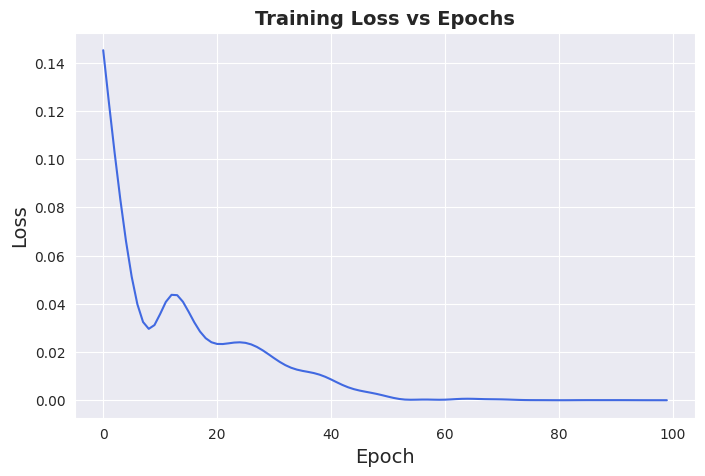

In [33]:
# Retraining our model with the tuned parameters

#constant parameters as used in a baseline RNN
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_rnn_model['hidden_dim'])
num_layers = int(best_rnn_model['num_layers'])
time_step = int(best_rnn_model['time_step'])

#declaring the model
torch.manual_seed(69)
tuned_rnn = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
tuned_rnn = to_device(tuned_rnn, device)

#training and evaluating model
evaluate_single_model(tuned_rnn, num_epochs, lr, loss_type, optimiser, time_step)

# Long Short-Term Memory Model (LSTM)

In [34]:
class LSTM_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(LSTM_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.lstm = nn.LSTM(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        c0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [35]:
gc.collect()
torch.cuda.empty_cache()

Training time: 0.40674710273742676

Train Score: 0.90 RMSE
Validation Score: 34.98 RMSE


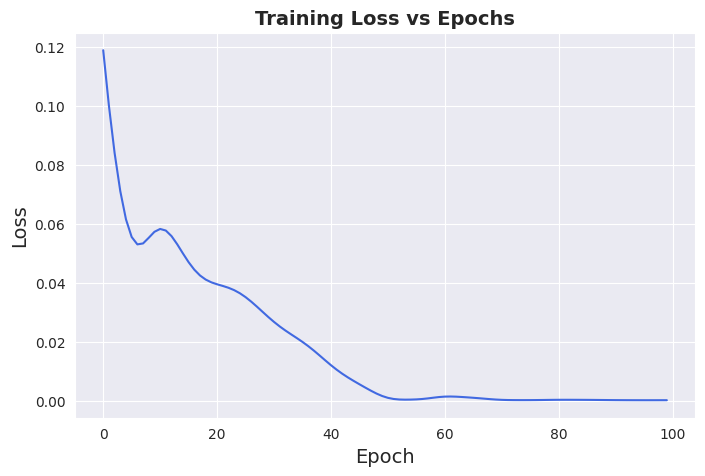

In [36]:
#parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_rnn_model['hidden_dim'])
num_layers = int(best_rnn_model['num_layers'])
time_step = int(best_rnn_model['time_step'])


#declaring the LSTM model
torch.manual_seed(69)
lstm_1 = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
lstm_1 = to_device(lstm_1, device)

#training and evaluating model
evaluate_single_model(lstm_1, num_epochs, lr, loss_type, optimiser, time_step)

In [37]:
gc.collect()
torch.cuda.empty_cache()

## Hyperparameter Tuning with LSTM

In [38]:
#constant parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#lists of parameters for hyperparameter tuning
num_layers = [1, 2]
sliding_windows = [20, 30, 50, 100]
hidden_dims = [2, 4, 8, 16, 32]

LSTM_results=[]

for time_step in sliding_windows:
    for hidden_dim in hidden_dims:
        for layers in num_layers:

            gc.collect()
            torch.cuda.empty_cache()

            print("====================================================")
            print("Time Step =", time_step, "| Hidden States =", hidden_dim, "| Num Layers =", layers)
            print("====================================================")
            print()

            #declaring the model
            torch.manual_seed(69)
            lstm_exp = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            lstm_exp = to_device(lstm_exp, device)

            #training and evaluating model
            LSTM_res = evaluate_model_experiments(lstm_exp, num_epochs, lr, loss_type, optimiser, time_step)
            LSTM_results += [LSTM_res.iloc[0]]
            print()

Time Step = 20 | Hidden States = 2 | Num Layers = 1

Training time: 0.18594145774841309

Train Score: 15.72 RMSE
Validation Score: 73.86 RMSE

Time Step = 20 | Hidden States = 2 | Num Layers = 2

Training time: 0.3202826976776123

Train Score: 1.71 RMSE
Validation Score: 40.97 RMSE

Time Step = 20 | Hidden States = 4 | Num Layers = 1

Training time: 0.18003177642822266

Train Score: 0.91 RMSE
Validation Score: 33.93 RMSE

Time Step = 20 | Hidden States = 4 | Num Layers = 2

Training time: 0.23511123657226562

Train Score: 16.56 RMSE
Validation Score: 77.38 RMSE

Time Step = 20 | Hidden States = 8 | Num Layers = 1

Training time: 0.18422603607177734

Train Score: 1.34 RMSE
Validation Score: 32.69 RMSE

Time Step = 20 | Hidden States = 8 | Num Layers = 2

Training time: 0.2666616439819336

Train Score: 1.62 RMSE
Validation Score: 40.73 RMSE

Time Step = 20 | Hidden States = 16 | Num Layers = 1

Training time: 0.34637880325317383

Train Score: 1.32 RMSE
Validation Score: 33.33 RMSE

Time 

In [39]:
LSTM_results = pd.DataFrame(LSTM_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)

In [40]:
LSTM_results = LSTM_results.sort_values('valScore', ascending=True, ignore_index = True)
LSTM_results

,time_step,num_layers,hidden_dim,trainScore,valScore
0,30.0,1.0,32.0,0.676720,18.678154
1,50.0,1.0,32.0,0.677144,18.949978
2,20.0,1.0,32.0,0.685304,19.142403
3,100.0,1.0,32.0,0.679651,20.168728
4,50.0,2.0,16.0,0.778002,26.457307
5,30.0,2.0,16.0,0.782918,27.543635
6,100.0,2.0,16.0,0.766359,27.957539
7,20.0,2.0,16.0,0.837084,28.732355
8,30.0,2.0,32.0,0.959206,30.308471
9,20.0,2.0,32.0,0.972833,30.632804


In [41]:
best_lstm_model = LSTM_results.iloc[0]
best_lstm_model

time_step     30.000000
num_layers     1.000000
hidden_dim    32.000000
trainScore     0.676720
valScore      18.678154
Name: 0, dtype: float64

Training time: 0.49309873580932617

Train Score: 0.68 RMSE
Validation Score: 18.68 RMSE


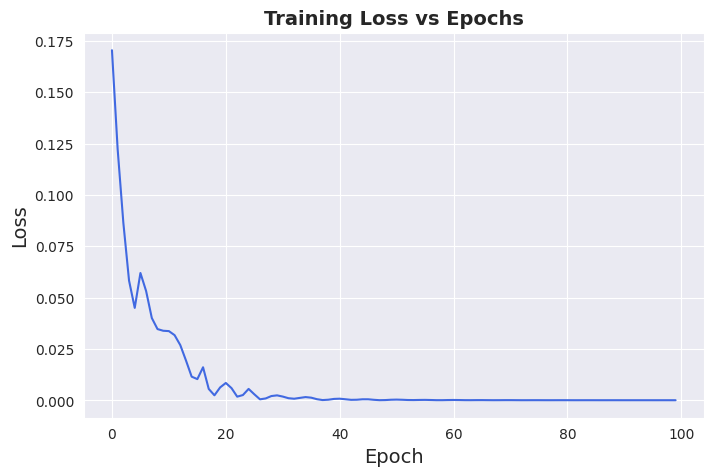

In [42]:
# Retraining our model with tuned parameters

#constant parameters as used in a baseline RNN
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_lstm_model['hidden_dim'])
num_layers = int(best_lstm_model['num_layers'])
time_step = int(best_lstm_model['time_step'])

#declaring the model
torch.manual_seed(69)
tuned_lstm = LSTM_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
tuned_lstm = to_device(tuned_lstm, device)

#training and evaluating model
evaluate_single_model(tuned_lstm, num_epochs, lr, loss_type, optimiser, time_step)

# Gated Recurrent Unit (GRU)

In [43]:
class GRU_model(nn.Module):
    def __init__(self, input_dim, hidden_dim, layer_dim, output_dim):
        super(GRU_model, self).__init__()
        self.hidden_dim = hidden_dim
        self.layer_dim = layer_dim

        self.gru = nn.GRU(input_dim, hidden_dim, layer_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = Variable(torch.zeros(self.layer_dim, x.size(0), self.hidden_dim, device = device))
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [44]:
gc.collect()
torch.cuda.empty_cache()

Training time: 0.5565133094787598

Train Score: 0.52 RMSE
Validation Score: 8.66 RMSE


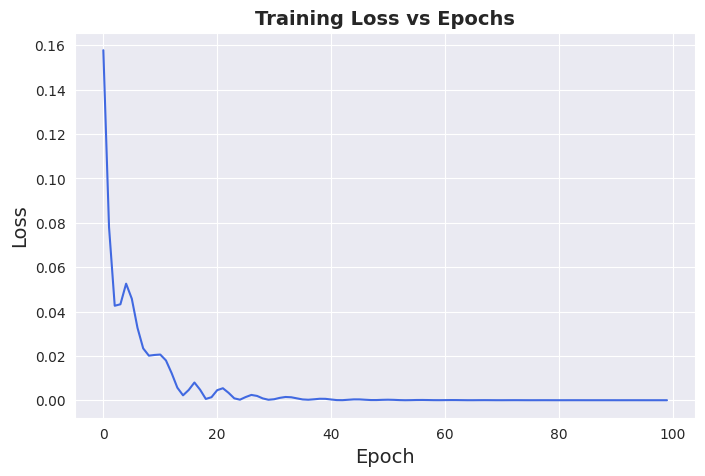

In [45]:
#parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_lstm_model['hidden_dim'])
num_layers = int(best_lstm_model['num_layers'])
time_step = int(best_lstm_model['time_step'])

#declaring the model
torch.manual_seed(69)
gru = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
gru = to_device(gru, device)

#training and evaluating model
evaluate_single_model(gru, num_epochs, lr, loss_type, optimiser, time_step)

In [46]:
gc.collect()
torch.cuda.empty_cache()

## Hyperparameter Tuning with GRU

In [47]:
#constant parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#lists of parameters for hyperparameter tuning
num_layers = [1, 2]
sliding_windows = [20, 30, 50, 100]
hidden_dims = [2, 4, 8, 16, 32]

GRU_results=[]

for time_step in sliding_windows:
    for hidden_dim in hidden_dims:
        for layers in num_layers:

            gc.collect()
            torch.cuda.empty_cache()

            print("====================================================")
            print("Time Step =", time_step, "| Hidden States =", hidden_dim, "| Num Layers =", layers)
            print("====================================================")
            print()

            #declaring the model
            torch.manual_seed(69)
            gru_exp = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = layers)
            gru_exp = to_device(gru_exp, device)

            #training and evaluating model
            GRU_res = evaluate_model_experiments(gru_exp, num_epochs, lr, loss_type, optimiser, time_step)
            GRU_results += [GRU_res.iloc[0]]
            print()


Time Step = 20 | Hidden States = 2 | Num Layers = 1

Training time: 0.18442177772521973

Train Score: 5.34 RMSE
Validation Score: 48.37 RMSE

Time Step = 20 | Hidden States = 2 | Num Layers = 2

Training time: 0.2202591896057129

Train Score: 3.20 RMSE
Validation Score: 47.06 RMSE

Time Step = 20 | Hidden States = 4 | Num Layers = 1

Training time: 0.22746872901916504

Train Score: 1.38 RMSE
Validation Score: 35.37 RMSE

Time Step = 20 | Hidden States = 4 | Num Layers = 2

Training time: 0.2614014148712158

Train Score: 1.30 RMSE
Validation Score: 40.53 RMSE

Time Step = 20 | Hidden States = 8 | Num Layers = 1

Training time: 0.22991561889648438

Train Score: 0.68 RMSE
Validation Score: 18.54 RMSE

Time Step = 20 | Hidden States = 8 | Num Layers = 2

Training time: 0.278242826461792

Train Score: 1.60 RMSE
Validation Score: 37.08 RMSE

Time Step = 20 | Hidden States = 16 | Num Layers = 1

Training time: 0.24455690383911133

Train Score: 0.60 RMSE
Validation Score: 16.01 RMSE

Time Step

In [48]:
GRU_results = pd.DataFrame(GRU_results, columns=['time_step', 'num_layers', 'hidden_dim', 'trainScore', 'valScore'], index = None)

In [49]:
GRU_results = GRU_results.sort_values('valScore', ascending=True, ignore_index = True)
GRU_results

,time_step,num_layers,hidden_dim,trainScore,valScore
0,20.0,1.0,32.0,0.516506,8.574308
1,30.0,1.0,32.0,0.516257,8.659860
2,50.0,1.0,32.0,0.517532,8.839115
3,100.0,1.0,32.0,0.521233,9.362226
4,20.0,2.0,32.0,0.513832,15.645402
5,30.0,2.0,32.0,0.507174,15.715226
6,20.0,1.0,16.0,0.602691,16.011718
7,50.0,2.0,32.0,0.508113,16.152527
8,50.0,1.0,16.0,0.607143,16.296368
9,30.0,1.0,16.0,0.611239,16.382909


In [50]:
best_gru_model = GRU_results.iloc[0]
best_gru_model

time_step     20.000000
num_layers     1.000000
hidden_dim    32.000000
trainScore     0.516506
valScore       8.574308
Name: 0, dtype: float64

Training time: 0.402965784072876

Train Score: 0.52 RMSE
Validation Score: 8.57 RMSE


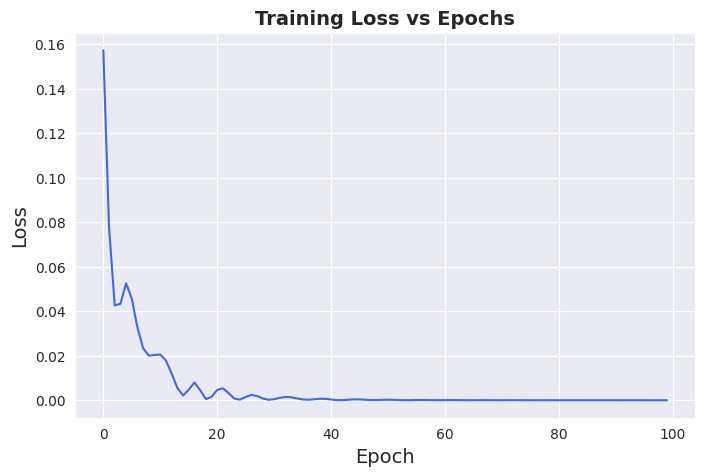

In [51]:
# Retraining our model with tuned parameters

#constant parameters as used in a baseline RNN
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_gru_model['hidden_dim'])
num_layers = int(best_gru_model['num_layers'])
time_step = int(best_gru_model['time_step'])

#declaring the model
torch.manual_seed(69)
tune_gru = GRU_model(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
tune_gru = to_device(tune_gru, device)

#training and evaluating model
evaluate_single_model(tune_gru, num_epochs, lr, loss_type, optimiser, time_step)

# Running and testing the Final Model

Training time: 0.2411353588104248

Train Score: 0.80 RMSE
Test Score: 2.74 RMSE


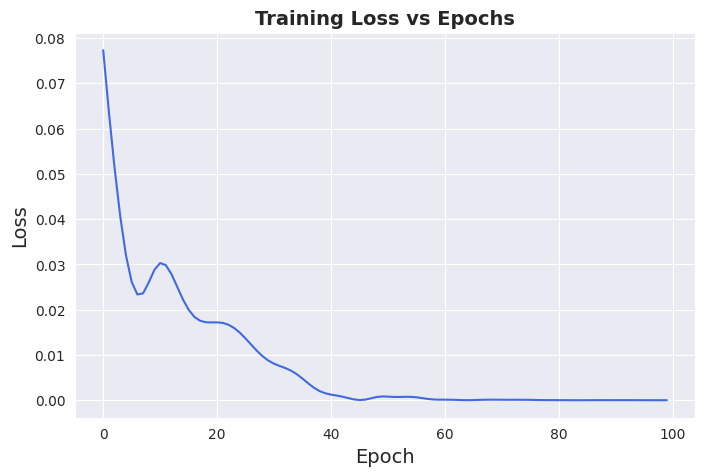

In [52]:
#parameters
input_dim = 1
output_dim = 1
num_epochs = 100
lr = 0.01
loss_type = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam

#tuned hyperparameters
hidden_dim = int(best_rnn_model['hidden_dim'])
num_layers = int(best_rnn_model['num_layers'])
time_step = int(best_rnn_model['time_step'])

#declaring the model
torch.manual_seed(69)
final_model = RNN_relu(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, layer_dim = num_layers)
final_model = to_device(final_model, device)

#training and testing the best model
test_final_model(final_model, num_epochs, lr, loss_type, optimiser, time_step)

### For Full graph display, please visit https://nbviewer.org/github/MritSriH/Deep-Learning/blob/main/RNN_STOCKS_PREDICTION.ipynb